<a href="https://colab.research.google.com/github/tejascworks/Implementation-and-Deployment-of-Machine-Learning-And-Deep-Learning/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
# StandardScaler is in sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def pretty_print_linear(coefs, names=None, sort=False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
      lst=sorted(lst, key=lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                      for coef, name in lst)

In [ ]:
def load_data():
  boston=pd.read_csv("Boston.csv")
  x=boston.drop('PRICE',axis=1)
  y=boston['PRICE']
  names=boston.colomns
  return x,y,names


In [ ]:
def scale_data(x):
  scaler=StandardScaler()
  x_scaled=scaler.fit_transform(x)
  return x_scaled

In [32]:
def split_data(x,y):
  x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42)
  return x_train, x_test, y_train, y_test


Function to calculate Root Mean Square Error (RMSE)

In [ ]:
def root_mean_square_error(y_pred, y_test):
  rmse_train=np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
  return rmse_train

In [40]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

def plot_real_vs_predicted(y_prad, y_test):
  plt.plot(y_pred, y_test,'ro') # Now plt is defined and can be used
  plt.plot([0,50],[0,50],'g-')
  plt.xlabel('predicted')
  plt.ylabel('real')

In [34]:
def generate_regression_values(model, x, y):
  params=np.append(model.intercept_,model.coef_)
  predictions=model.predict(x)
  newx=pd.DataFrame({"Constant": np.ones(len(x))}).join(pd.DataFrame(x))
  MSE=(sum((y-predictions)**2))/(len(newx)-len(newx.columns))
  var_b=MSE*(np.linalg.inv(np.dot(newx.T,newx)).diagonal())
  sd_b=np.sqrt(var_b)
  ts_b=params/sd_b


In [35]:
def generate_regression_values(model, x, y):
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    newX = pd.DataFrame({"Constant": np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y - predictions) ** 2)) / (len(newX) - len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - 1)))
                for i in ts_b]

    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    params = np.round(params, 4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"], myDF3["Standard Errors"], myDF3["t values"], myDF3[
        "Probabilites"
    ] = [params, sd_b, ts_b, p_values]
    print(myDF3)

In [ ]:
x,y,names = load_data()

In [ ]:
import numpy as np

np.set_printoptions(precision=2, linewidth=100, suppress=True,edgeitems=2)

In [ ]:
x[0:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


linear regression

linear model: -17.203 * NOX + 4.439 * RM + 2.784 * CHAS + -1.448 * DIS + -0.915 * PTRATIO + -0.509 * LSTAT + 0.262 * RAD + -0.113 * CRIM  + 0.04 * INDUS + 0.03 * ZN + 0.012 * B + -0.011 * TAX + -0.006 * AGE
root mean square error: 4.928602182665332


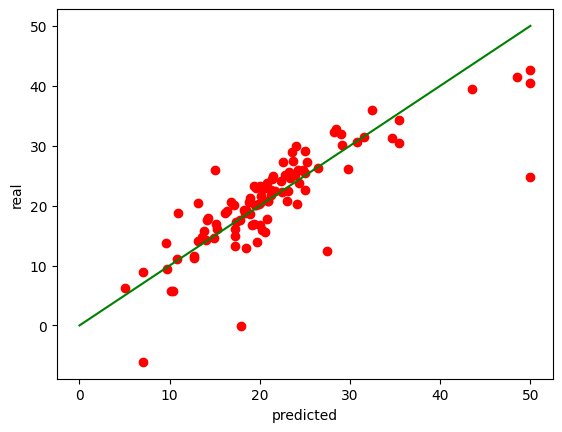

In [48]:

from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
linreg.fit(x_train, y_train)
print("linear model:", pretty_print_linear(linreg.coef_, names, sort=True))
y_lin_predict = linreg.predict(x_test)
print("root mean square error: {}".format(root_mean_square_error(y_lin_predict, y_test)))
plot_real_vs_predicted(y_test, y_lin_predict)

Lasso Regression

lasso model: 3.725 * RM + -1.028 * DIS + -0.738 * PTRATIO + -0.611 * LSTAT + 0.243 * RAD + -0.1 * CRIM  + 0.034 * ZN + -0.013 * TAX + 0.013 * B + -0.006 * AGE + -0.002 * INDUS + 0.0 * CHAS + -0.0 * NOX
root mean square error: {} 4.973154882818795


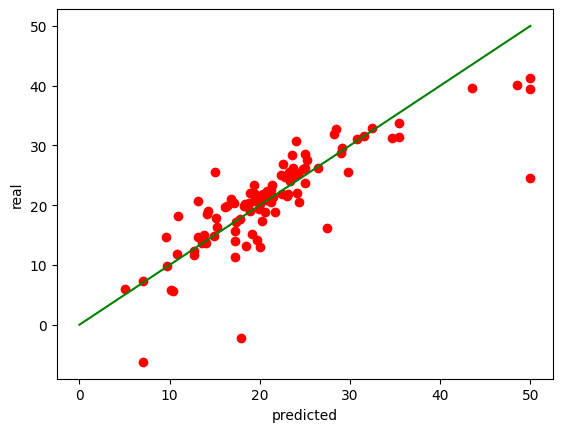

In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.3)
lasso.fit(x_train, y_train)
print("lasso model:", pretty_print_linear(lasso.coef_, names, sort=True))
y_lasso_predict = lasso.predict(x_test)
print("root mean square error: {}", root_mean_square_error(y_lasso_predict, y_test))
plot_real_vs_predicted(y_test, y_lasso_predict)